# 42577 Introduction to Business Analytics course 
## _Data Challenge Project_
### Dataset: From Santiago de Chile
### Project Steps:
### 1) Data Cleaning, understanding attributes, statistical analysis.
### 2) Prediction part. (Applying Machine Learning Algorithms.
### 3) Exploratory Component  (new research question). A different notebook.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10
#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)

In [2]:
data = pd.read_excel("Households Data.xlsx", sheet_name="Hogares")

Let's see some of our data

In [3]:
data.head()

,Hogar,EXCLUIR,paraValidacion,Sector,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,...,Acc_Habitacion_tpte_pub,Acc_Industria_tpte_pub,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto,CLUSTER7,CLUSTER2
0,100010,0,0,7,335180.8019,6266420.975,100000,450845,136.393738,11,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,0,0,7,338410.2114,6265607.141,120000,1019369,73.843597,11,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,0,0,7,327863.8248,6257800.086,70000,80000,180.722809,10,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,0,0,7,327864.0000,6257800.000,80000,559259,150.379059,14,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,0,0,7,338480.8152,6267296.941,117771,710309,122.001518,12,...,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


## 1) Data Cleaning, understanding attributes, statistical analysis.

**Names of attributes are going to be chaged to be more clear during analysis.**

In [4]:
new_names = {
    "Hogar": "id",
    "paraValidacion": "validation",
    "Sector": "sector",
    "Factor": "familyWeight",
    "DirCoordX": "coord_x", 
    "DirCoordY": "coord_y",
    "EXCLUIR": "exclude",
    "MontoArr": "rent",
    "IngresoHogar": "income",
    "AnosEstudio": "education",
    "CLASE": "class",
    "Sup_Prom_Constr_Hab_EOD": "surface",
    "Calid_EOD_norm_inv": "quality",
    "DensConstr_EOD" : "density",
    "Dist_est_Metro_MC_KM" : "distSubway",
    "Dist_salida_Autop_MC_KM": "distHighway",
    "Tiempo_Com_Stgo" : "travelTime",
    "Ingreso_Promedio_Zona_MM": "avgIncomeZone",
    "Acc_Comercio_tpte_pub" : "accCom_pub",
    "Acc_Educacion_tpte_pub" : "accEdu_pub",
    "Acc_Habitacion_tpte_pub" : "accHab_pub",
    "Acc_Industria_tpte_pub" : "accWork_pub",
    "Acc_Servicios_tpte_pub" : "accServ_pub",
    "Acc_Comercio_auto" : "accCom_car",
    "Acc_Educacion_auto" : "accEdu_car",
    "Acc_Habitacion_auto" : "accHab_car",
    "Acc_Industria_auto" : "accWork_car",
    "Acc_Servicios_auto" : "accServ_car",
    "CLUSTER7": "cluster_7",
    "CLUSTER2": "cluster_2"
}
data.rename(columns=new_names, inplace=True)
data[:5].T

,0,1,2,3,4
id,100010.0000,100020.0000,100030.0000,100041.00,100052.0000
exclude,0.0000,0.0000,0.0000,0.00,0.0000
validation,0.0000,0.0000,0.0000,0.00,0.0000
sector,7.0000,7.0000,7.0000,7.00,7.0000
coord_x,335180.8019,338410.2114,327863.8248,327864.00,338480.8152
...,...,...,...,...,...
accHab_car,30505.6500,30505.6500,30505.6500,30505.65,30505.6500
accWork_car,2853.1900,2853.1900,2853.1900,2853.19,2853.1900
accServ_car,3058.0300,3058.0300,3058.0300,3058.03,3058.0300
cluster_7,3.0000,3.0000,3.0000,3.00,3.0000


**Let's examine data types and figure out which should be turned into different data types. For example class and sector variable should be categorical variables.**

In [5]:
data.dtypes

id               int64
exclude          int64
validation       int64
sector           int64
coord_x        float64
                ...   
accHab_car     float64
accWork_car    float64
accServ_car    float64
cluster_7        int64
cluster_2        int64
Length: 30, dtype: object

**For the cleaning below steps are going to be applied;**
- In "exclude" rows which have the value of "1" should be dropped as it is mentioned in the FAQs.
- After dropping values of "1" in the "exclude" column, we should drop the exclude column since it will be all over zeros.
- After this for the "validation" column, only values of "0" are left as well. Therefore, this column is dropped.
- Since "cluster7" and "cluster2" column is a result of some people's analysis we will drop it as well. 
- "id" column is dropped since it is going to mislead the model if it stays in data set. 
- The coordinates are fixed in sense of converting them in "UTM" mesaures. We have found package called as "utm" in pyton to convert these values. Then the previous coordinates are dropped.
- Then the variables are converted in the right data types. And one out of K coding is applied.
- Since coordinate values in the values is going to represent something numerical in the model, it will mislead the model as well. Therefore according to coordinates, "zone" column is created and grid values are used to create zone areas.
- Then "zone" column in converted into categorical variable and one out of K coding is applied.
- Then "coord_X" and "coord_Y" columns are used to create train and test sets. Then those columns are dropped as well. 
- Since we will try to predict "class" column, "income" and "education" columns are dropped as well.
- Since data attribute values have wide ranges, they are standardized as well. (Except the "class" variable.)
- Stat_df is the data which only doesn't contain categorical variables. This data set is used for statistical analysis

First drop "exclude" column rows which has the value of "1".

In [6]:
ix = data["exclude"] == 1
dropping_ones = data[ix]

In [7]:
dropping_ones.index
data = data.drop(dropping_ones.index)

In [8]:
# reset the index
data = data.reset_index(drop=True)

In [9]:
drop_labels = ["exclude", "cluster_7", "cluster_2", "id"]
data.drop(drop_labels, inplace = True, axis = 1)

In [10]:
data.query('validation==1', inplace=False) 

,validation,sector,coord_x,coord_y,rent,income,familyWeight,education,class,surface,...,accCom_pub,accEdu_pub,accHab_pub,accWork_pub,accServ_pub,accCom_car,accEdu_car,accHab_car,accWork_car,accServ_car


There is only "0" values in validation therefore I will drop that one as well.

In [11]:
drop_labels = ["validation"]
data.drop(drop_labels, inplace = True, axis = 1)

Target variable is "class" column. Convert categorical features using one out of k coding

In [12]:
data['class'] = (data['class']).astype("category")
data['sector'] = (data['sector']).astype("category")
data = pd.get_dummies(data, columns=['sector'])

convert utm to latitude & longitude and drop previous values.

In [13]:
import utm
def utmconvert(a,b):
    x=np.zeros(len(a))
    y=np.zeros(len(b))
    for i in range(len(a)):
        x[i], y[i] = utm.to_latlon(a[i], b[i], 19, 'H')
    return x,y

x , y = utmconvert(data['coord_x'],data['coord_y'])
data['coord_X'] = x
data['coord_Y'] = y
drop_labels = ["coord_x", "coord_y"] 
data.drop(drop_labels, inplace = True, axis = 1)

Creating grids in the data;

In [14]:
def f(row):
    if -33.9 <= row['coord_X'] < -33.8 and -71.3 <= row['coord_Y'] < -71.2 :
        val = "Zone_1" 
    elif -33.9 <= row['coord_X'] < -33.8 and -71.2 <= row['coord_Y'] < -71.1:
        val = "Zone_2"
    elif -33.9 <= row['coord_X'] < -33.8 and -71.1 <= row['coord_Y'] < -71.0:
        val = "Zone_3"
    elif -33.9 <= row['coord_X'] < -33.8 and -71.0 <= row['coord_Y'] < -70.9:
        val = "Zone_4"
    elif -33.9 <= row['coord_X'] < -33.8 and -70.9 <= row['coord_Y'] < -70.8:
        val = "Zone_5"
    elif -33.9 <= row['coord_X'] < -33.8 and -70.8 <= row['coord_Y'] < -70.7:
        val = "Zone_6"
    elif -33.9 <= row['coord_X'] < -33.8 and -70.7 <= row['coord_Y'] < -70.6:
        val = "Zone_7"
    elif -33.9 <= row['coord_X'] < -33.8 and -70.6 <= row['coord_Y'] < -70.5:
        val = "Zone_8"
    elif -33.9 <= row['coord_X'] < -33.8 and -70.5 <= row['coord_Y'] < -70.4:
        val = "Zone_9"
    elif -33.8 <= row['coord_X'] < -33.7 and -71.3 <= row['coord_Y'] < -71.2:
        val = "Zone_10" 
    elif -33.8 <= row['coord_X'] < -33.7 and -71.2 <= row['coord_Y'] < -71.1:
        val = "Zone_11"
    elif -33.8 <= row['coord_X'] < -33.7 and -71.1 <= row['coord_Y'] < -71.0:
        val = "Zone_12"
    elif -33.8 <= row['coord_X'] < -33.7 and -71.0 <= row['coord_Y'] < -70.9:
        val = "Zone_13"
    elif -33.8 <= row['coord_X'] < -33.7 and -70.9 <= row['coord_Y'] < -70.8:
        val = "Zone_14"
    elif -33.8 <= row['coord_X'] < -33.7 and -70.8 <= row['coord_Y'] < -70.7:
        val = "Zone_15"
    elif -33.8 <= row['coord_X'] < -33.7 and -70.7 <= row['coord_Y'] < -70.6:
        val = "Zone_16"
    elif -33.8 <= row['coord_X'] < -33.7 and -70.6 <= row['coord_Y'] < -70.5:
        val = "Zone_17"
    elif -33.8 <= row['coord_X'] < -33.7 and -70.5 <= row['coord_Y'] < -70.4:
        val = "Zone_18"
    elif -33.7 <= row['coord_X'] < -33.6 and -71.3 <= row['coord_Y'] < -71.2:
        val = "Zone_19" 
    elif -33.7 <= row['coord_X'] < -33.6 and -71.2 <= row['coord_Y'] < -71.1:
        val = "Zone_20"
    elif -33.7 <= row['coord_X'] < -33.6 and -71.1 <= row['coord_Y'] < -71.0:
        val = "Zone_21"
    elif -33.7 <= row['coord_X'] < -33.6 and -71.0 <= row['coord_Y'] < -70.9:
        val = "Zone_22"
    elif -33.7 <= row['coord_X'] < -33.6 and -70.9 <= row['coord_Y'] < -70.8:
        val = "Zone_23"
    elif -33.7 <= row['coord_X'] < -33.6 and -70.8 <= row['coord_Y'] < -70.7:
        val = "Zone_24"
    elif -33.7 <= row['coord_X'] < -33.6 and -70.7 <= row['coord_Y'] < -70.6:
        val = "Zone_25"
    elif -33.7 <= row['coord_X'] < -33.6 and -70.6 <= row['coord_Y'] < -70.5:
        val = "Zone_26"
    elif -33.7 <= row['coord_X'] < -33.6 and -70.5 <= row['coord_Y'] < -70.4:
        val = "Zone_27"
    elif -33.6 <= row['coord_X'] < -33.5 and -71.3 <= row['coord_Y'] < -71.2:
        val = "Zone_28" 
    elif -33.6 <= row['coord_X'] < -33.5 and -71.2 <= row['coord_Y'] < -71.1:
        val = "Zone_29"
    elif -33.6 <= row['coord_X'] < -33.5 and -71.1 <= row['coord_Y'] < -71.0:
        val = "Zone_30"
    elif -33.6 <= row['coord_X'] < -33.5 and -71.0 <= row['coord_Y'] < -70.9:
        val = "Zone_31"
    elif -33.6 <= row['coord_X'] < -33.5 and -70.9 <= row['coord_Y'] < -70.8:
        val = "Zone_32"
    elif -33.6 <= row['coord_X'] < -33.5 and -70.8 <= row['coord_Y'] < -70.7:
        val = "Zone_33"
    elif -33.6 <= row['coord_X'] < -33.5 and -70.7 <= row['coord_Y'] < -70.6:
        val = "Zone_34"
    elif -33.6 <= row['coord_X'] < -33.5 and -70.6 <= row['coord_Y'] < -70.5:
        val = "Zone_35"
    elif -33.6 <= row['coord_X'] < -33.5 and -70.5 <= row['coord_Y'] < -70.4:
        val = "Zone_36"
    elif -33.5 <= row['coord_X'] < -33.4 and -71.3 <= row['coord_Y'] < -71.2:
        val = "Zone_37" 
    elif -33.5 <= row['coord_X'] < -33.4 and -71.2 <= row['coord_Y'] < -71.1:
        val = "Zone_38"
    elif -33.5 <= row['coord_X'] < -33.4 and -71.1 <= row['coord_Y'] < -71.0:
        val = "Zone_39"
    elif -33.5 <= row['coord_X'] < -33.4 and -71.0 <= row['coord_Y'] < -70.9:
        val = "Zone_40"
    elif -33.5 <= row['coord_X'] < -33.4 and -70.9 <= row['coord_Y'] < -70.8:
        val = "Zone_41"
    elif -33.5 <= row['coord_X'] < -33.4 and -70.8 <= row['coord_Y'] < -70.7:
        val = "Zone_42"
    elif -33.5 <= row['coord_X'] < -33.4 and -70.7 <= row['coord_Y'] < -70.6:
        val = "Zone_43"
    elif -33.5 <= row['coord_X'] < -33.4 and -70.6 <= row['coord_Y'] < -70.5:
        val = "Zone_44"
    elif -33.5 <= row['coord_X'] < -33.4 and -70.5 <= row['coord_Y'] < -70.4:
        val = "Zone_45"
    elif -33.4 <= row['coord_X'] < -33.3 and -71.3 <= row['coord_Y'] < -71.2:
        val = "Zone_46" 
    elif -33.4 <= row['coord_X'] < -33.3 and -71.2 <= row['coord_Y'] < -71.1:
        val = "Zone_47"
    elif -33.4 <= row['coord_X'] < -33.3 and -71.1 <= row['coord_Y'] < -71.0:
        val = "Zone_48"
    elif -33.4 <= row['coord_X'] < -33.3 and -71.0 <= row['coord_Y'] < -70.9:
        val = "Zone_49"
    elif -33.4 <= row['coord_X'] < -33.3 and -70.9 <= row['coord_Y'] < -70.8:
        val = "Zone_50"
    elif -33.4 <= row['coord_X'] < -33.3 and -70.8 <= row['coord_Y'] < -70.7:
        val = "Zone_51"
    elif -33.4 <= row['coord_X'] < -33.3 and -70.7 <= row['coord_Y'] < -70.6:
        val = "Zone_52"
    elif -33.4 <= row['coord_X'] < -33.3 and -70.6 <= row['coord_Y'] < -70.5:
        val = "Zone_53"
    elif -33.4 <= row['coord_X'] < -33.3 and -70.5 <= row['coord_Y'] < -70.4:
        val = "Zone_54"
    elif -33.3 <= row['coord_X'] < -33.2 and -71.3 <= row['coord_Y'] < -71.2:
        val = "Zone_55" 
    elif -33.3 <= row['coord_X'] < -33.2 and -71.2 <= row['coord_Y'] < -71.1:
        val = "Zone_56"
    elif -33.3 <= row['coord_X'] < -33.2 and -71.1 <= row['coord_Y'] < -71.0:
        val = "Zone_57"
    elif -33.3 <= row['coord_X'] < -33.2 and -71.0 <= row['coord_Y'] < -70.9:
        val = "Zone_58"
    elif -33.3 <= row['coord_X'] < -33.2 and -70.9 <= row['coord_Y'] < -70.8:
        val = "Zone_59"
    elif -33.3 <= row['coord_X'] < -33.2 and -70.8 <= row['coord_Y'] < -70.7:
        val = "Zone_60"
    elif -33.3 <= row['coord_X'] < -33.2 and -70.7 <= row['coord_Y'] < -70.6:
        val = "Zone_61"
    elif -33.3 <= row['coord_X'] < -33.2 and -70.6 <= row['coord_Y'] < -70.5:
        val = "Zone_62"
    elif -33.3 <= row['coord_X'] < -33.2 and -70.5 <= row['coord_Y'] < -70.4:
        val = "Zone_63"
    elif -33.2 <= row['coord_X'] < -33.1 and -71.3 <= row['coord_Y'] < -71.2:
        val = "Zone_64" 
    elif -33.2 <= row['coord_X'] < -33.1 and -71.2 <= row['coord_Y'] < -71.1:
        val = "Zone_65"
    elif -33.2 <= row['coord_X'] < -33.1 and -71.1 <= row['coord_Y'] < -71.0:
        val = "Zone_66"
    elif -33.2 <= row['coord_X'] < -33.1 and -71.0 <= row['coord_Y'] < -70.9:
        val = "Zone_67"
    elif -33.2 <= row['coord_X'] < -33.1 and -70.9 <= row['coord_Y'] < -70.8:
        val = "Zone_68"
    elif -33.2 <= row['coord_X'] < -33.1 and -70.8 <= row['coord_Y'] < -70.7:
        val = "Zone_69"
    elif -33.2 <= row['coord_X'] < -33.1 and -70.7 <= row['coord_Y'] < -70.6:
        val = "Zone_70"
    elif -33.2 <= row['coord_X'] < -33.1 and -70.6 <= row['coord_Y'] < -70.5:
        val = "Zone_71"
    elif -33.2 <= row['coord_X'] < -33.1 and -70.5 <= row['coord_Y'] < -70.4:
        val = "Zone_72"
    else:
        val = "OUT_OF_ZONE"
    return val

In the above code, we have started to create the zone numbers from the southern east part to northern east part. Then we had zone numbers on the left most region of the zones.Then we have created to zone number via sliding region border coordinates from left to right side.

In [15]:
data['zone'] = data.apply(f, axis=1)

In [16]:
unique_zones = data["zone"].unique()
"we had 72 zones but the coordinates are just in {} of them".format(len(unique_zones))

'we had 72 zones but the coordinates are just in 35 of them'

# - Before creating the train and test set there are two steps to be followed;
    - Drop "income" and "education" attributes.
    - Create "zone" attribute.
    - Convert "zone" columns to category type and apply one out of k coding.
    - Standardize the data in order to have similiar ranges of data.
        - While standardizing data, one out of k coding applied categorical variable are affeceted as well. Therefore, we have created another train and test set at which these categorical variables are not standardized since their ranges aren't different than others.
         
        
# - To create train and test set;
    - Use "coord_x" and "coord_y" columns to seperate data as train and test set.
    - Drop "coord_x" and "coord_y" columns.

In [17]:
data['zone'] = (data['zone']).astype("category")
data = pd.get_dummies(data, columns=['zone'])

- Since we have created "zone" column, we don't need coordinates anymore. we will just use them for the train and test set split.
- Another train data will be created at which the "zone" and "sector" columns are not standardized since they are just the values of "0" and "1". Maybe this is going to affect prediction accuracies.

In [18]:
y = data.loc[:, data.columns == "class"]
Coord_Xs = data.loc[: , data.columns == "coord_X"]
Coord_Ys = data.loc[: , data.columns == "coord_Y"]
sets = pd.concat([Coord_Xs, Coord_Ys], axis=1)
X = data.drop(["class", "coord_X", "coord_Y", "income", "education"], inplace = False, axis = 1)

In [19]:
data.columns

Index(['rent', 'income', 'familyWeight', 'education', 'class', 'surface',
       'quality', 'density', 'distSubway', 'distHighway', 'travelTime',
       'avgIncomeZone', 'accCom_pub', 'accEdu_pub', 'accHab_pub',
       'accWork_pub', 'accServ_pub', 'accCom_car', 'accEdu_car', 'accHab_car',
       'accWork_car', 'accServ_car', 'sector_1', 'sector_2', 'sector_3',
       'sector_4', 'sector_5', 'sector_6', 'sector_7', 'coord_X', 'coord_Y',
       'zone_Zone_10', 'zone_Zone_13', 'zone_Zone_14', 'zone_Zone_15',
       'zone_Zone_16', 'zone_Zone_17', 'zone_Zone_19', 'zone_Zone_20',
       'zone_Zone_21', 'zone_Zone_22', 'zone_Zone_23', 'zone_Zone_24',
       'zone_Zone_25', 'zone_Zone_26', 'zone_Zone_27', 'zone_Zone_29',
       'zone_Zone_32', 'zone_Zone_33', 'zone_Zone_34', 'zone_Zone_35',
       'zone_Zone_41', 'zone_Zone_42', 'zone_Zone_43', 'zone_Zone_44',
       'zone_Zone_5', 'zone_Zone_50', 'zone_Zone_51', 'zone_Zone_52',
       'zone_Zone_53', 'zone_Zone_54', 'zone_Zone_59', 'zone_Zo

In [20]:
data_2 = data.copy()

In [21]:
from sklearn.preprocessing import StandardScaler
data_2[['rent', 'income', 'familyWeight', 'education', 'surface',
       'quality', 'density', 'distSubway', 'distHighway', 'travelTime',
       'avgIncomeZone', 'accCom_pub', 'accEdu_pub', 'accHab_pub',
       'accWork_pub', 'accServ_pub', 'accCom_car', 'accEdu_car', 'accHab_car',
       'accWork_car', 'accServ_car']] = StandardScaler().fit_transform(data_2[['rent', 'income', 'familyWeight', 'education', 'surface',
       'quality', 'density', 'distSubway', 'distHighway', 'travelTime',
       'avgIncomeZone', 'accCom_pub', 'accEdu_pub', 'accHab_pub',
       'accWork_pub', 'accServ_pub', 'accCom_car', 'accEdu_car', 'accHab_car',
       'accWork_car', 'accServ_car']])

In [22]:
pd.options.display.max_rows = 10

In [23]:
data_2 = data_2.drop(["income", "education"], inplace = False, axis = 1)

Standardize all columns except target variable. Standardizing before train and test split is very important for our case.

In [24]:
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean)/X_std
data_norm = pd.concat([y, X_norm, sets], axis=1)

In [25]:
test = data_norm.query('-70.7 <= coord_Y <= -70.6 and -33.5 <= coord_X <= -33.4', inplace = False)
test_2 = data_2.query('-70.7 <= coord_Y <= -70.6 and -33.5 <= coord_X <= -33.4', inplace = False)

In [26]:
train = data_norm.drop(test.index)
train_2 = data_2.drop(test_2.index)

In [27]:
train = train.drop(["coord_X", "coord_Y"], axis = 1, inplace = False)
test = test.drop(["coord_X", "coord_Y"], axis = 1, inplace = False)

train_2 = train_2.drop(["coord_X", "coord_Y"], axis = 1, inplace = False)
test_2 = test_2.drop(["coord_X", "coord_Y"], axis = 1, inplace = False)

In [28]:
X_train = train.loc[:, train.columns != "class"]
X_test = test.loc[:, test.columns != "class"]
X_train2 = train_2.loc[:, train_2.columns != "class"]
X_test2 = test_2.loc[:, test_2.columns != "class"]

y_train = train.loc[:, train.columns == "class"]
y_test = test.loc[:, test.columns == "class"]

In [29]:
# reset the index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
# data is ready for descriptive analysis
X_train2 = X_train2.reset_index(drop=True)
X_test2 = X_test2.reset_index(drop=True)

# DESCRIPTIVE ANALYSIS

For the descriptive analysis, we have created a new dataframe. At this analysis, we have dropped categorical variables. Then analyzed the data in terms of distribution, outliers and correlation.

In [30]:
data_XX = pd.concat([X_train, X_test], axis=0)
data_YY = pd.concat([y_train, y_test], axis=0)
stat_df = pd.concat([data_XX, data_YY], axis=1)

In [31]:
stat_df = stat_df.reset_index(drop=True)

In [32]:
stat_df.columns

Index(['rent', 'familyWeight', 'surface', 'quality', 'density', 'distSubway',
       'distHighway', 'travelTime', 'avgIncomeZone', 'accCom_pub',
       'accEdu_pub', 'accHab_pub', 'accWork_pub', 'accServ_pub', 'accCom_car',
       'accEdu_car', 'accHab_car', 'accWork_car', 'accServ_car', 'sector_1',
       'sector_2', 'sector_3', 'sector_4', 'sector_5', 'sector_6', 'sector_7',
       'zone_Zone_10', 'zone_Zone_13', 'zone_Zone_14', 'zone_Zone_15',
       'zone_Zone_16', 'zone_Zone_17', 'zone_Zone_19', 'zone_Zone_20',
       'zone_Zone_21', 'zone_Zone_22', 'zone_Zone_23', 'zone_Zone_24',
       'zone_Zone_25', 'zone_Zone_26', 'zone_Zone_27', 'zone_Zone_29',
       'zone_Zone_32', 'zone_Zone_33', 'zone_Zone_34', 'zone_Zone_35',
       'zone_Zone_41', 'zone_Zone_42', 'zone_Zone_43', 'zone_Zone_44',
       'zone_Zone_5', 'zone_Zone_50', 'zone_Zone_51', 'zone_Zone_52',
       'zone_Zone_53', 'zone_Zone_54', 'zone_Zone_59', 'zone_Zone_60',
       'zone_Zone_61', 'zone_Zone_68', 'zone_Zone_70'

In [33]:
stat_df = stat_df.loc[:,['rent', 'familyWeight', 'surface', 'quality', 'density', 'distSubway',
       'distHighway', 'travelTime', 'avgIncomeZone', 'accCom_pub',
       'accEdu_pub', 'accHab_pub', 'accWork_pub', 'accServ_pub', 'accCom_car',
       'accEdu_car', 'accHab_car', 'accWork_car', 'accServ_car']]

In [34]:
stat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rent,16047.0,-3.660080e-16,1.0,-1.116576,-0.476631,-0.227291,0.090310,30.580078
familyWeight,16047.0,6.817573e-15,1.0,-1.448641,-0.594561,-0.238211,0.285414,10.999447
surface,16047.0,3.290666e-14,1.0,-2.235509,-0.481977,-0.188970,0.306888,7.109152
quality,16047.0,3.133349e-13,1.0,-1.881550,-0.842478,0.369772,0.947034,1.004761
density,16047.0,5.040220e-15,1.0,-0.824940,-0.436105,-0.266951,-0.049467,9.278177
...,...,...,...,...,...,...,...,...
accCom_car,16047.0,3.426007e-14,1.0,-3.066742,-0.505584,0.131553,0.688360,1.717860
accEdu_car,16047.0,-3.133255e-15,1.0,-3.272688,-0.389900,0.156841,0.707308,1.522822
accHab_car,16047.0,2.150909e-14,1.0,-3.401851,-0.357878,0.221324,0.731853,1.269041
accWork_car,16047.0,1.324770e-13,1.0,-3.147301,-0.443619,0.150458,0.716541,1.689855


Number of values are equal for each attribute which means there isn’t any NaN values. Minimum and Maximum values of each attribute diﬀers but not so much since we have standardized data beforehand. Because range of each attributes were ranging really huge. **Standardization of data let us to compare features that have diﬀerent units or scales and have further statistical analysis.**

In [35]:
att_names = stat_df.columns
df_values = stat_df.values
m = len(att_names)

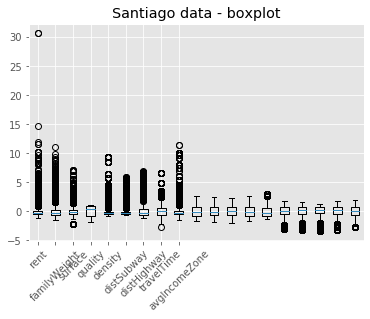

In [36]:
from matplotlib.pyplot import boxplot, xticks, ylabel, title, show
boxplot(df_values)
xticks(range(1,10),att_names, rotation=45)
title('Santiago data - boxplot')
show()

__Let's visualize better.__

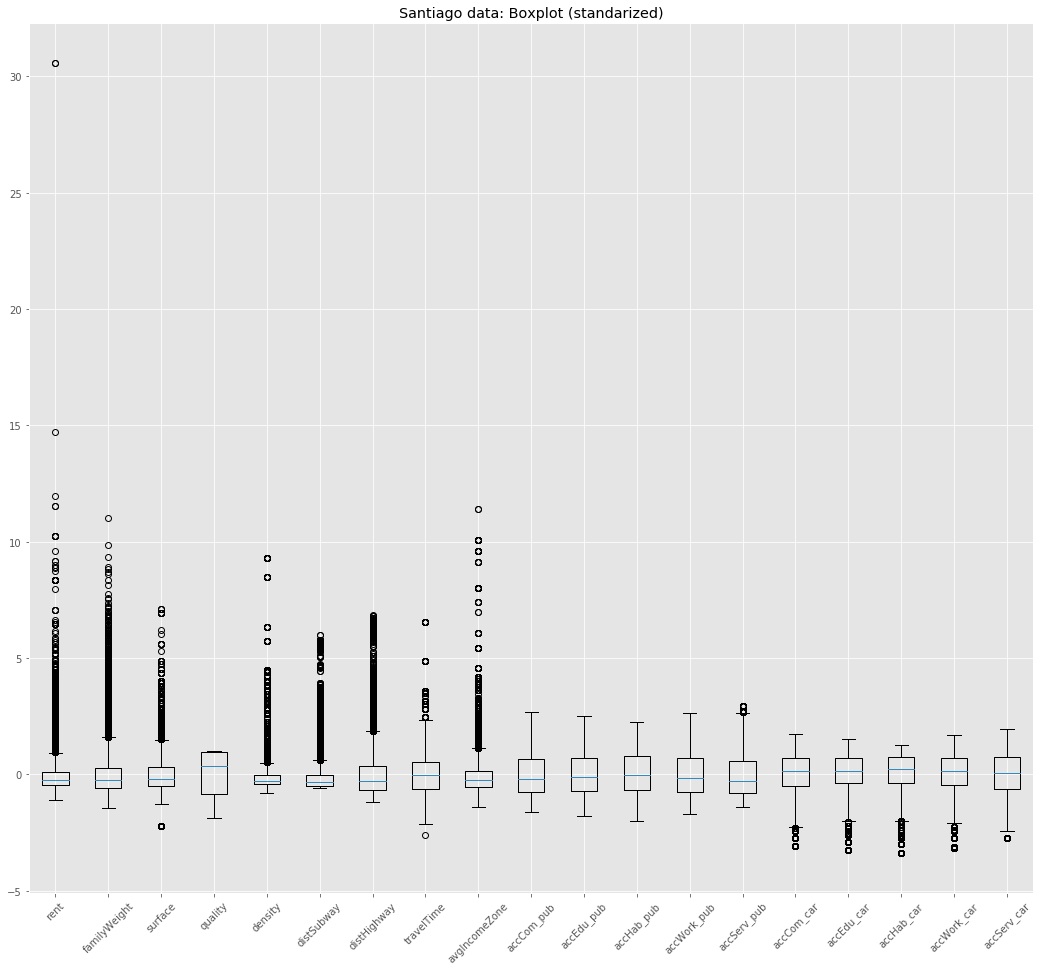

In [37]:
from scipy.stats import zscore
zscored_data = zscore(df_values, ddof = 1)
from matplotlib.pyplot import (figure, title, boxplot, xticks, subplot, hist,
                               xlabel, ylim, yticks, show)
figure(figsize=(18,16))
title('Santiago data: Boxplot (standarized)')
boxplot(zscored_data)
xticks(range(1,m+1), att_names, rotation=45)
show()

As it is seen there are __lots of outliers__ in the data. Only the attributes of "quality", "accCom_pub", "accEdu_pub", "accHab_pub", "accWork_pub" seems doesn't have outliers. (Only thses attributes don't have values that diﬀer greatly from the median.) And maybe follow normal distribution. But we can't comment about normal distribution just form box plot. Therefore, we will further examine with histogram and qqplot. Espacially attributes like "rent", "familyWeight", "avgIncomeZone" and "density" has huge amount of outliers. In feature selection, we will see that these variable are among the important variables. This outliers maybe drives algorithms to have worse results. But at the end od the dat, dropping these outliers is a kind of information loss. Therefore, we have chosen to keep those outlier values.

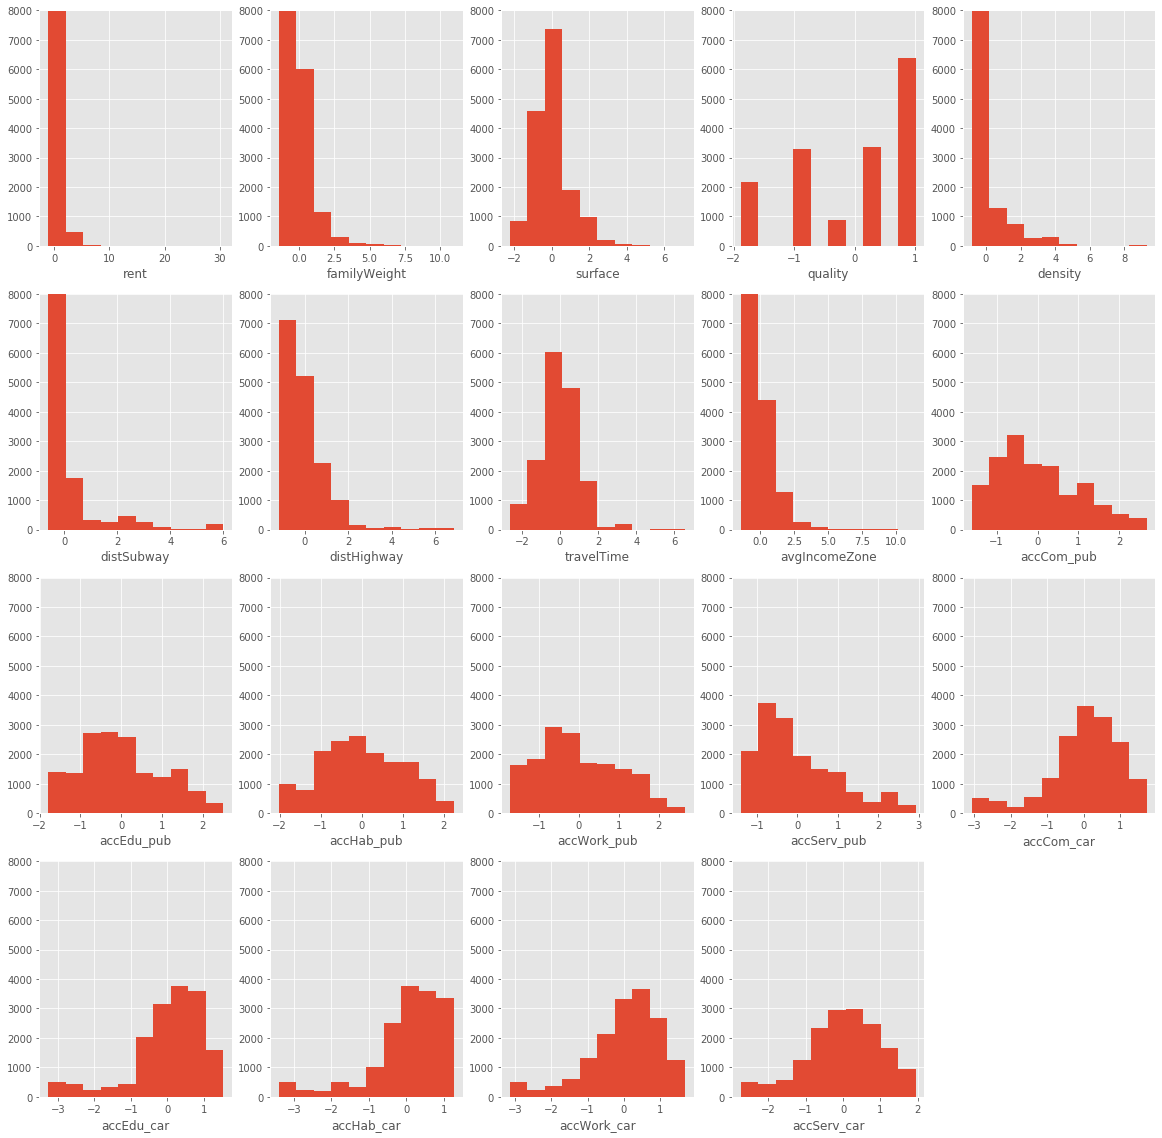

<Figure size 432x288 with 0 Axes>

In [38]:
from matplotlib.pyplot import figure, subplot, hist, xlabel, ylim, show, imshow
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
df_values = stat_df.values
m = len(att_names)
figure(figsize=(20,20))
u = np.floor(np.sqrt(m))
v = np.ceil(float(19)/u)

for i in range(m):
    subplot(u,v,i+1)
    hist(df_values[:,i])
    xlabel(att_names[i])
    ylim(0,len(stat_df["rent"])/2)
show()
plt.tight_layout()

Most of the attributes have outliers. Therefore these outliers disrupt distribution approximation. From box plot analysis "quality", "accCom_pub", "accEdu_pub", "accHab_pub", "accWork_pub" seemed as following normal distribution. But among these attributes only attributes of "accCom_pub", "accEdu_pub", "accHab_pub", "accWork_pub" seems to follow normal distribution but they are also skewed a little.

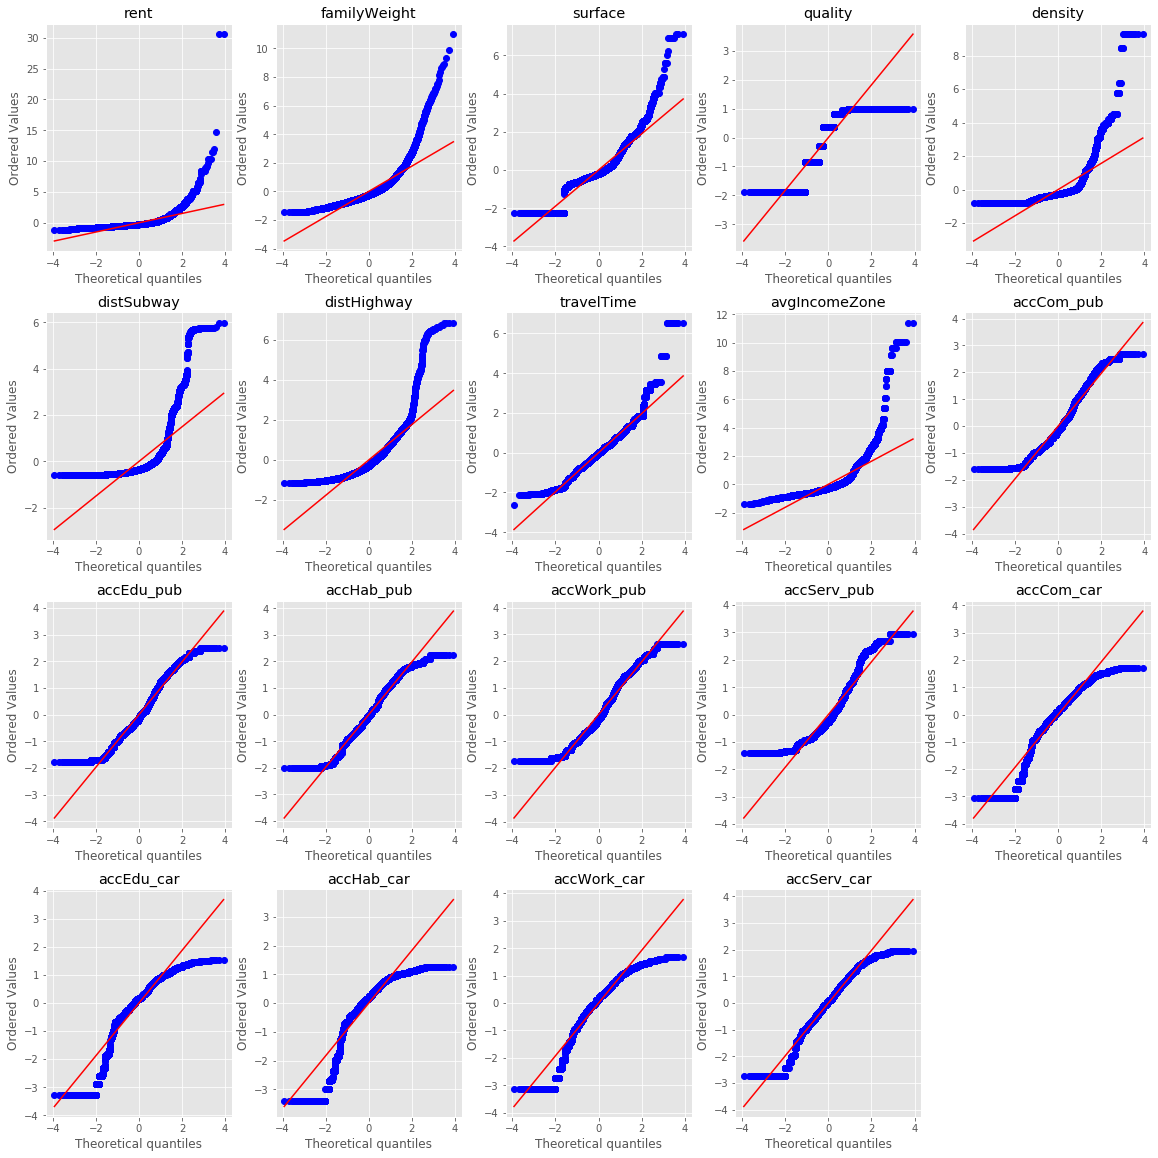

<Figure size 432x288 with 0 Axes>

In [39]:
import pylab
import scipy.stats as stats
plt.figure(figsize=(16,16))
for i,col in enumerate(att_names):
    ax = plt.subplot(4,5,i+1)
    stats.probplot(stat_df[col], dist="norm", plot=pylab)
    ax.set_title(col)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
pylab.show()
plt.tight_layout()

When the Q-Q PLots are examined, we can verify our comments as aforementioned. Again attributes specified above shows again its outliers. Again some of the attributes mentioned above are closer to normal distribution but has some issues with skewness.

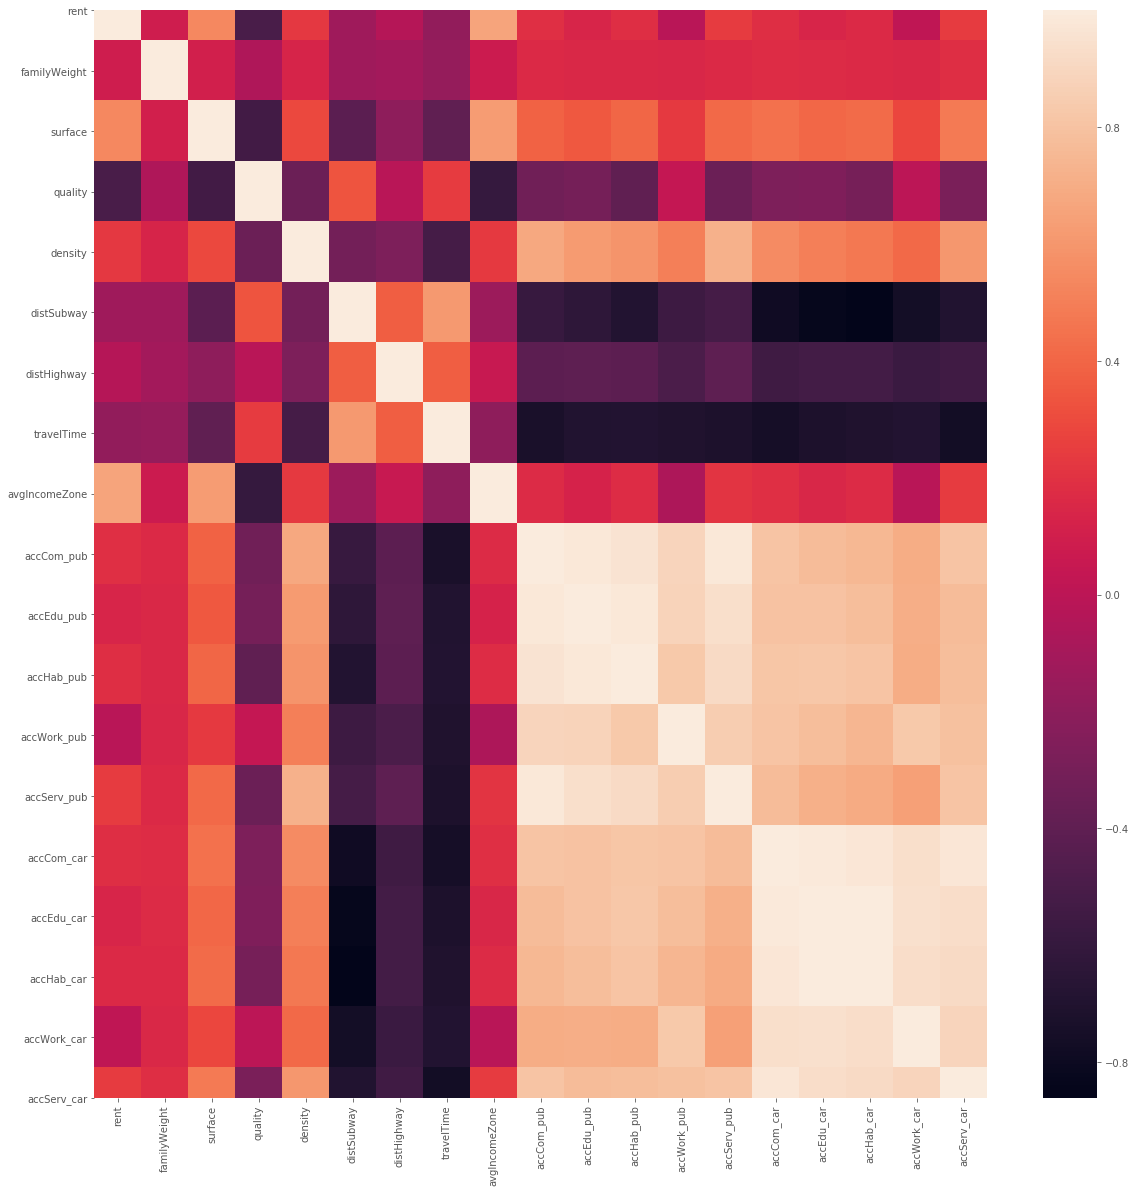

In [40]:
import seaborn as sys
corr = stat_df.corr()
size = 20
fig, ax = plt.subplots(figsize=(size, size))
sys.heatmap(corr)

Attributes regarding to accessibility is highly correlated. Most of them has roughly 70% of correlation or higher. And it is super easy to see that, distance to subway and highway columns have negative correlation. Because accesibility constant increase if the distance is smaller. Therefore it is really logicful. It is interesting that, "quality" attribute has roughly negative correlation with "rent", "surface", "avgIncomeZone" attributes. Average Construction Quality of residential units in zone which refers to "quality" attribute should increase while "rent" and "avgIncomeZone" increases. There should be positive high correlation instead of negative high correlation. When this situation is asked the lecturer, he said the values are adversely created. Therefore, there isn't problem regarding this situation. This negative correlation is examined at further scatter plots.

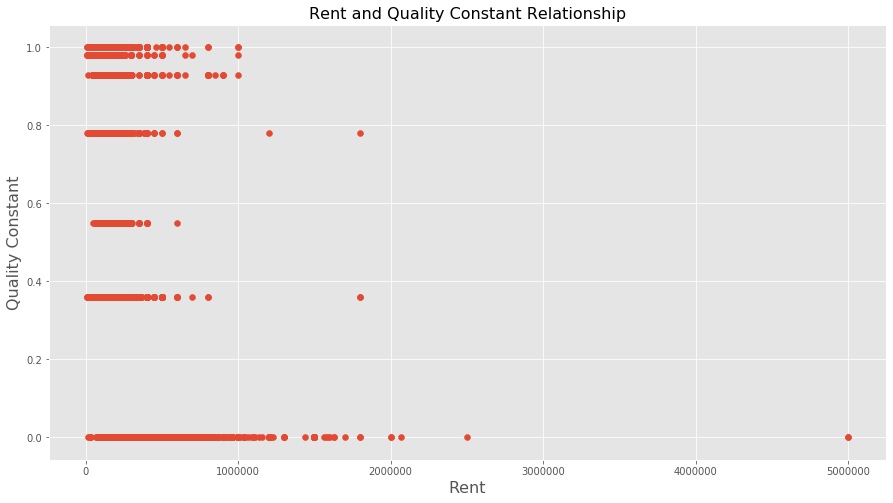

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
plt.scatter(data["rent"], data["quality"])
plt.xlabel('Rent', fontsize=16)
plt.ylabel('Quality Constant', fontsize=16)
plt.title("Rent and Quality Constant Relationship", fontsize=16)
plt.show()

Seems that when the quality constant is 0, there are more greater values in the rent. But at the same quality constant values, there are different rent values as well. Therefore we can't comment about direct relationship but we can sum up as, 0 values for quality constant is more related with higher values of rent.

In [42]:
sorted(list(set(data["quality"])))

[0.0, 0.36, 0.55, 0.78, 0.93, 0.98, 1.0]

## 2) Prediction part (Applying Machine Learning Algorithms).

Let's create a function to evaluate predictions

In [120]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

def evaluate(y_true, y_pred, print_cm=False):
    # calculate and display confusion matrix
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    if print_cm:
        print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
        print(cm)

    # calculate precision, recall, and F1 score
    accuracy = float(np.trace(cm)) / np.sum(cm)
    precision = precision_score(y_true, y_pred, average=None, labels=labels)[1]
    recall = recall_score(y_true, y_pred, average=None, labels=labels)[1]
    f1 = 2 * precision * recall / (precision + recall)
    print("accuracy:", accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print("f1 score:", f1)

Before applying algoritms, let's map y values to 0, 1 and 2.

In [139]:
y_train["class"] =y_train["class"].map({1: 0, 2: 1, 3: 2})
y_test["class"] =y_test["class"].map({1: 0, 2: 1, 3: 2})

## Applying algorithms that we have seen in our lectures.

The result of decision tree with default setting is not ideal, so we  tuned parameters to improve the model's performance on predicting test data. Max_depth and min_samples_split are used to control the complexity of model. By testing the model on a range of both parameters, and it turns out that we choose x for Max_depth and y for min_samples_split the model has highest accuracy.

In [122]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,min_samples_split = 1000)
dt.fit(X_train2,y_train)
dt.score(X_test2,y_test)
y1_pred = dt.predict(X_test2)

evaluate(y_test, y1_pred, print_cm=False)

accuracy: 0.481453154875717
precision: 0.46484698097601324
recall: 0.48869565217391303
f1 score: 0.4764730818143281


Accuracy value isn't so satisfying. We will try other models.
Let's apply decision tree with the other train and test set.

In [123]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,min_samples_split = 1000)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)
y1_pred = dt.predict(X_test2)

evaluate(y_test, y1_pred, print_cm=False)

accuracy: 0.481453154875717
precision: 0.46484698097601324
recall: 0.48869565217391303
f1 score: 0.4764730818143281


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier() 

param_grid = {"n_estimators": [10, 20, 50],
              "max_depth": [1, 3, 5, 10],
              "min_samples_split": [2, 5, 10, 20],
              "min_samples_leaf": [1, 10, 20],
              "min_weight_fraction_leaf": [0, 0.1, 0.2]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_result = grid.fit(X_train2, y_train)

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed

In [48]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.543925 using {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 10}
0.482504 (0.028892) with: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'n_estimators': 10}
0.479675 (0.033310) with: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'n_estimators': 20}
0.480122 (0.027715) with: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'n_estimators': 50}
0.458085 (0.015173) with: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 10}
0.461361 (0.028821) with: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 20}
0.469476 (0.016890) with: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 50}
0.449449

Above parameter tuning has yielded the result as follows;

Best: 0.543925 using {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 10}

In [51]:
model = RandomForestClassifier(max_depth = 10, min_samples_leaf = 20, min_samples_split = 5, min_weight_fraction_leaf =  0.1, 
                               n_estimators= 10) 
model.fit(X_train,y_train)
model.score(X_test,y_test)
y1_pred = dt.predict(X_test)

evaluate(y_test, y1_pred, print_cm=False)

accuracy: 0.481453154875717
precision: 0.46484698097601324
recall: 0.48869565217391303
f1 score: 0.4764730818143281


C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Test data yields the close result with previous algorithm like %48 of accuracy.

 Logistic Rregression is considered as another good way to predict target. In this part, we choose a solver named 'newton-cg' since it is more suitable for multiclass problem than the default solver. Then to avoid overfiting, we trialed on different Lamdas, the model perform well when the lamda is 10^3.

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, roc_auc_score, f1_score
#  ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs
LogReg=LogisticRegression(penalty='l2', C = 0.001,solver= 'newton-cg', multi_class="multinomial") # 10^-3
LogReg.fit(X_train2, y_train)
y_pred_train = LogReg.predict(X_train2)
y_pred_test = LogReg.predict(X_test2)
print("- Train set results:")
evaluate(y_train, y_pred_train)
print("- Test set results:")
evaluate(y_test, y_pred_test)

C:\Users\han\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Train set results:
accuracy: 0.5733323406789755
precision: 0.528610771113831
recall: 0.5903964456596036
f1 score: 0.5577978689053923
- Test set results:
accuracy: 0.5246653919694073
precision: 0.4821973550356053
recall: 0.8243478260869566
f1 score: 0.6084724005134788


In [155]:
LogReg.fit(X_train, y_train)
y_pred_train = LogReg.predict(X_train)
y_pred_test = LogReg.predict(X_test)
LogReg.fit(X_train2, y_train)
print("- Train set results:")
evaluate(y_train, y_pred_train)
print("- Test set results:")
evaluate(y_test, y_pred_test)

C:\Users\han\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Train set results:
accuracy: 0.5710244192972007
precision: 0.5310989365130518
recall: 0.5632262474367737
f1 score: 0.5466909935312656
- Test set results:
accuracy: 0.5166347992351816
precision: 0.47619047619047616
recall: 0.8695652173913043
f1 score: 0.6153846153846153


X_train2 resulted better in terms of accuracy. And Logistic Regression resulted better result with both train and test set. Accuracy has increased to %52.5.

In [55]:
arr2 = LogReg.coef_[2].copy()
arr1 = LogReg.coef_[1].copy()
arr0 = LogReg.coef_[0].copy()
arr0 = abs(arr0)
arr1 = abs(arr1)
arr2 = abs(arr2)

In [56]:
def important_features(X, arr):
    for cname, val in zip(X.columns, arr.tolist()):
        if val > 0.05:
            print("%s=%.3f"%(cname, val))

In [57]:
print("For the class 1, important features are:")
important_features(X, arr0)
print("\nFor the class 2, important features are:")
important_features(X, arr1)
print("\nFor the class 3, important features are:")
important_features(X, arr2)

For the class 1, important features are:
rent=0.365
surface=0.114
quality=0.081
density=0.053
avgIncomeZone=0.302
zone_Zone_26=0.052
zone_Zone_33=0.075
zone_Zone_34=0.109
zone_Zone_35=0.095

For the class 2, important features are:
zone_Zone_34=0.057
zone_Zone_35=0.055

For the class 3, important features are:
rent=0.361
surface=0.150
quality=0.114
distSubway=0.058
distHighway=0.055
avgIncomeZone=0.288
zone_Zone_34=0.052
zone_Zone_44=0.067


According to attributes above, I will consider those for the feature selection as well. Let's apply XGBoosting classifier model to our data.

In [124]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

C:\Users\han\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [60]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 51.74%


In [61]:
evaluate(y_test, y_pred, print_cm=False)

accuracy: 0.5173996175908222
precision: 0.48725212464589235
recall: 0.5982608695652174
f1 score: 0.537080405932865


Result is around %51. Not better than Logistic Regression.

In [125]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve

-  Learning Task Parameters
    - multi:softmax* | multi:softprob, eval_metric:merror | mlogloss* | auc,
- Booster Parameters
    - lambda [default=1] -> L2 regularization term on weights (analogous to Ridge regression)
    - alpha [default=0] -> L1 regularization term on weight (analogous to Lasso regression)

- eta –> learning_rate
- lambda –> reg_lambda
- alpha –> reg_alpha

- xgb – this is the direct xgboost library. I will use a specific function “cv” from this library
- XGBClassifier – this is an sklearn wrapper for XGBoost. This allows us to use sklearn’s Grid Search with parallel processing in the same way we did for GBM

In [126]:
def modelfit(alg, X_train, y_train, X_test, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = int(3)
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)#, show_progress=False
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train,eval_metric='merror')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_test)
    dtrain_predprob = alg.predict_proba(X_test)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(y_test.values, dtrain_predictions))
    evaluate(y_test, dtrain_predictions)

Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In [64]:
#Choose all predictors except target & IDcols
predictors = [x for x in X_train.columns]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= "multi:softmax",
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, X_train, y_train, X_test, y_test)


Model Report
Accuracy : 0.5285
accuracy: 0.52848948374761
precision: 0.48915816326530615
recall: 0.6669565217391304
f1 score: 0.5643855776306107


Accuracy has improved to ~%53. Let's apply parameter tuning to XGboosting as well. Below code is taking **much time**. For that reason we won't run it again and again. We have obtained the results for each parameter in the next cell.

In [65]:

# Create XGB Classifier object
xgb_clf = xgb.XGBClassifier(tree_method = "exact", predictor = "cpu_predictor", verbosity = 3,
                            objective = "multi:softmax")

# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

from sklearn.model_selection import RandomizedSearchCV
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 10, verbose = 3, random_state = 40 )

# Fit the model
model_xgboost = xgb_rscv.fit(X_train, y_train)

# Model best estimators
print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
print("Max Features at Split: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",
      model_xgboost.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])


'\n# Create XGB Classifier object\nxgb_clf = xgb.XGBClassifier(tree_method = "exact", predictor = "cpu_predictor", verbosity = 3,\n                            objective = "multi:softmax")\n\n# Create parameter grid\nparameters = {"learning_rate": [0.1, 0.01, 0.001],\n               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],\n               "max_depth": [2, 4, 7, 10],\n               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],\n               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],\n               "reg_alpha": [0, 0.5, 1],\n               "reg_lambda": [1, 1.5, 2, 3, 4.5],\n               "min_child_weight": [1, 3, 5, 7],\n               "n_estimators": [100, 250, 500, 1000]}\n\nfrom sklearn.model_selection import RandomizedSearchCV\n# Create RandomizedSearchCV Object\nxgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",\n                             cv = 10, verbose = 3, random_state = 40 )\n\n# Fit the model\nmodel_xgboost = xgb_rscv.fit(X_trai

### Optimal Parameters from the above parameter tuning is as follows;

- Learning Rate:  0.001 (-> learning_rate)
- Gamma:  0.5 (-> gamma)
- Max Depth:  2  (-> max_depth)
- Subsample:  0.2 (-> subsample)
- Max Features at Split:  1.0 (-> colsample_bytree)
- Alpha:  0.5
- Lamda:  4.5
- Minimum Sum of the Instance Weight Hessian to Make a Child:  1  (-> min_child_weight)
- Number of Trees:  250 (n_estimators)

In [65]:
#Choose all predictors except target & IDcols
predictors = [x for x in X_train2.columns]
xgb1 = XGBClassifier(
 learning_rate =0.001,
 n_estimators=250,
 max_depth=2,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.2,
 colsample_bytree=1.0,
 reg_alpha = 0.5,
 reg_lambda = 4.5,
 objective= "multi:softmax",
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, X_train2, y_train, X_test2, y_test)


Model Report
Accuracy : 0.5228
accuracy: 0.5227533460803059
precision: 0.4876373626373626
recall: 0.6173913043478261
f1 score: 0.5448963929393706


In [66]:
#Choose all predictors except target & IDcols
predictors = [x for x in X_train.columns]
xgb1 = XGBClassifier(
 learning_rate =0.001,
 n_estimators=250,
 max_depth=2,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.2,
 colsample_bytree=1.0,
 reg_alpha = 0.5,
 reg_lambda = 4.5,
 objective= "multi:softmax",
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, X_train, y_train, X_test, y_test)


Model Report
Accuracy : 0.5228
accuracy: 0.5227533460803059
precision: 0.4876373626373626
recall: 0.6173913043478261
f1 score: 0.5448963929393706


Even if applying tunning parameters didn't increase much for XGBoosing algorithm. Therefore, we will apply Deep learning, and then feature selection will be applied.

Since in this project we are required to make prediction on a fixed area, it is not feasible to compare both models by cross-validation. 

As none of the models make ideal predictions with test data, we reviewed our training process to figure out which factor has greatest impact on the result.

The first one is the correlation of attributes. Clearly, the accuracies of tran data and test data are simlar



The other factor is the way we split data set.  In our point of view, train set area is not representing the whole area. Because the test is the centre of the city, it will have different features from country side.

Test set is relatevely isolated , at the central part of the city, but nothing inside of test area is used to train. So this might be the reason why results are not satisfying.

In [67]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(random_state=61, solver = 'sparse_cg', alpha = 5).fit(X_train, y_train)
print("Training data fit score:",clf.score(X_train, y_train), "\nTest data fit score:", clf.score(X_test, y_test))

Training data fit score: 0.5682698034544371 
Test data fit score: 0.5070745697896749


C:\Users\han\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
clf = RidgeClassifier(random_state=61, solver = 'svd', alpha = 5).fit(X_train2, y_train)
print("Training data fit score:",clf.score(X_train2, y_train), "\nTest data fit score:", clf.score(X_test2, y_test))

C:\Users\han\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training data fit score: 0.5670786182251341 
Test data fit score: 0.5116634799235181


In [69]:
arr2 = clf.coef_[2].copy()
arr1 = clf.coef_[1].copy()
arr0 = clf.coef_[0].copy()
arr0 = abs(arr0)
arr1 = abs(arr1)
arr2 = abs(arr2)

In [70]:
def important_features_2(X, arr):
    for cname, val in zip(X.columns, arr.tolist()):
        if val > 0.2:
            print("%s=%.3f"%(cname, val))

In [71]:
print("For the class 1, important features are:")
important_features_2(X, arr0)
print("\nFor the class 2, important features are:")
important_features_2(X, arr1)
print("\nFor the class 3, important features are:")
important_features_2(X, arr2)

For the class 1, important features are:
accCom_pub=1.259
accEdu_pub=0.254
accHab_pub=0.368
accWork_pub=0.223
accServ_pub=0.355
accCom_car=0.292
accEdu_car=0.255
accHab_car=0.534
accWork_car=0.521
accServ_car=0.508
zone_Zone_17=0.210
zone_Zone_19=0.273
zone_Zone_20=0.409
zone_Zone_26=0.237
zone_Zone_27=0.220
zone_Zone_34=0.305
zone_Zone_42=0.226
zone_Zone_59=0.206
zone_Zone_70=0.210

For the class 2, important features are:
accCom_pub=0.833
accHab_pub=0.371
accServ_pub=0.260
accCom_car=0.201
accHab_car=0.380
accWork_car=0.359
accServ_car=0.489
zone_Zone_19=0.230
zone_Zone_20=0.203
zone_Zone_34=0.267
zone_Zone_41=0.236
zone_Zone_70=0.360

For the class 3, important features are:
accCom_pub=0.426
zone_Zone_13=0.320
zone_Zone_20=0.206
zone_Zone_41=0.328
zone_Zone_5=0.213
zone_Zone_53=0.288


In [73]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

from sklearn.metrics import fbeta_score, make_scorer, accuracy_score

ac_scorer = make_scorer(accuracy_score)

model_to_set = OneVsRestClassifier(SVC(kernel="rbf"))  #kernel = "poly"
parameters = {
    "estimator__C": [1, 4, 8],                        
    "estimator__kernel": ["poly", "rbf"],             
    "estimator__degree":[1, 2, 3],                    
}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv = 10, scoring=ac_scorer)

model_tunning.fit(X_train2, y_train)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

C:\Users\han\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The 

C:\Users\han\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The 

0.5082638475282907
{'estimator__C': 1, 'estimator__degree': 1, 'estimator__kernel': 'rbf'}


In [76]:
model_tunning.cv_results_

{'mean_fit_time': array([40.78445518]),
 'std_fit_time': array([20.34888582]),
 'mean_score_time': array([3.10891819]),
 'std_score_time': array([1.48919017]),
 'param_estimator__C': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_estimator__degree': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_estimator__kernel': masked_array(data=['rbf'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'estimator__C': 1,
   'estimator__degree': 1,
   'estimator__kernel': 'rbf'}],
 'split0_test_score': array([0.4527881]),
 'split1_test_score': array([0.49070632]),
 'split2_test_score': array([0.56962025]),
 'split3_test_score': array([0.55100521]),
 'split4_test_score': array([0.5435592]),
 'split5_test_score': array([0.43335815]),
 'split6_test_score': array([0.55174981]),
 'split7_test_score': array([0.52643336]),
 'split8_test_

In [74]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

def evaluate(y_true, y_pred, print_cm=False):
    # calculate and display confusion matrix
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    if print_cm:
        print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
        print(cm)

    # calculate precision, recall, and F1 score
    accuracy = float(np.trace(cm)) / np.sum(cm)
    precision = precision_score(y_true, y_pred, average=None, labels=labels)[1]
    recall = recall_score(y_true, y_pred, average=None, labels=labels)[1]
    f1 = 2 * precision * recall / (precision + recall)
    print("accuracy:", accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print("f1 score:", f1)

In [166]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

Using TensorFlow backend.


In [167]:
Y_t = encoder.fit_transform(y_test)
Y = encoder.fit_transform(y_train)

In [168]:
from tensorflow.keras.models import Sequential #Sequential Models
from tensorflow.keras.layers import Dense #Dense Fully Connected Layer Type
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD #Stochastic Gradient Descent Optimizer
from sklearn.model_selection import GridSearchCV

In [78]:
from tensorflow.keras import regularizers

def create_network(learn_rate=0.01, momentum=0.9, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(100, input_shape=(61,), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))
    #stochastic gradient descent
    sgd = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [79]:
neural_network = KerasClassifier(build_fn=create_network, verbose=0, epochs=10, batch_size=100) # epochs=100, batch_size=10,

In [90]:
neural_network.fit(X_train2, Y, epochs=100, batch_size=100)

In [91]:
# evaluate the keras model
y_pred = neural_network.predict(X_test)
#y_pred = np.argmax(y_pred, axis=1)

# evaluate predictions
print("- Test set results:")
evaluate(y_test, y_pred)

- Test set results:
accuracy: 0.518546845124283
precision: 0.4815051020408163
recall: 0.6565217391304348
f1 score: 0.5555555555555556


Neural Network above yieleded accuracy of ~%52. It isn't better than Logistic Regression accuracy.

In [93]:
# evaluate the keras model
y_pred_tr = neural_network.predict(X_train2)
#y_pred = np.argmax(y_pred, axis=1)

# evaluate predictions
print("- Test set results:")
evaluate(y_train, y_pred_tr)

- Test set results:
accuracy: 0.595369267421084
precision: 0.5502330814981514
recall: 0.5849282296650717
f1 score: 0.5670504431375796


Train set is better predicted as expected. Let's apply paramater tuning. __We have applied wider range of parameters but Kernel died with wider ranges and gave memory and runtime error. Then we have applied narrower range but again it gave kernel error.__ If we would have better PC, maybe we have obtained better results.

In [95]:
from tensorflow.keras import regularizers

def create_network(learn_rate=0.01, momentum=0.0, dropout_rate=0.0, neurons1=30, neurons2=8, regu = 0.001):
    model = Sequential()
    model.add(Dense(neurons1, input_shape=(61,), activation='relu', kernel_regularizer=regularizers.l2(regu)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation='relu', kernel_regularizer=regularizers.l2(regu)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(regu)))
    #stochastic gradient descent
    sgd = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
neural_network = KerasClassifier(build_fn=create_network, verbose=0) # epochs=100, batch_size=10,

learn_rate = [0.001, 0.1]
momentum = [0.0, 0.9]
batch_size = [100, 200]
epochs = [10, 100]
dropout_rate = [0.0, 0.5]
neurons1 = [80]
neurons2 = [30]
regu = [0, 0.001]

param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, momentum=momentum, 
                  dropout_rate=dropout_rate, neurons1=neurons1, regu = regu) #, neurons2=neurons2

grid = GridSearchCV(estimator=neural_network, param_grid=param_grid, n_jobs=1, cv=5)

grid_result = grid.fit(X_train2, Y)


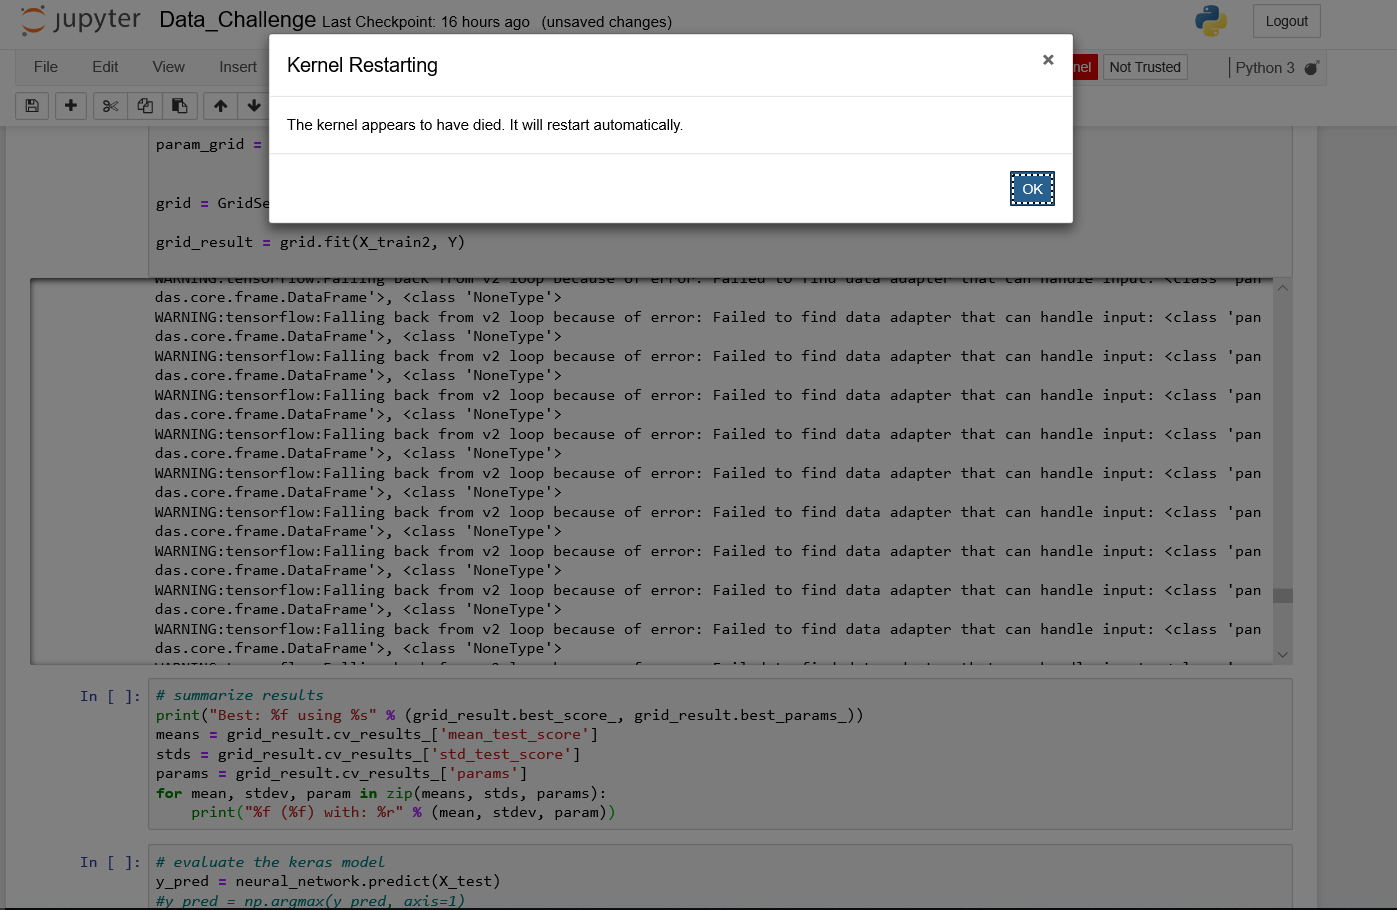

In [39]:
from IPython.display import Image
Image("Kernel_died.png")

Even with narrow range it doesn't work.

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# evaluate the keras model
y_pred = neural_network.predict(X_test)
#y_pred = np.argmax(y_pred, axis=1)

# evaluate predictions
print("- Test set results:")
evaluate(y_test, y_pred)

Now, we will apply feature selection methods to drop some attributes which makes the algorithm works worse.

## Feature Selection

- 1)  Univariate Selection
- 2)  Feature Importance
- 3)  Collinear Features
- 4)  Recursive feature elimination with cross-validation

Let's re-create our dataframe for feature selection analysis.

In [40]:
fea_data = data.copy()
fea_data = fea_data.drop(["coord_X", "coord_Y", "income", "education"], inplace = False, axis = 1)
data_XX = pd.concat([X_train, X_test], axis=0)
data_YY = pd.concat([y_train, y_test], axis=0)
fea_1 = pd.concat([data_XX, data_YY], axis=1)
fea_1 = fea_1.reset_index(drop=True)
data_XX = pd.concat([X_train2, X_test2], axis=0)
data_YY = pd.concat([y_train, y_test], axis=0)
fea_2 = pd.concat([data_XX, data_YY], axis=1)
fea_2 = fea_2.reset_index(drop=True)

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

### 1) Univariate Selection

#### The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features. The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features.

In [41]:
fea_data_X = fea_data.copy()
fea_data_y = fea_data.copy()

fea_data_X = fea_data_X.loc[:, fea_data_X.columns != "class"]
fea_data_y = fea_data_y.loc[:, fea_data_y.columns == "class"]

fea_data_y["class"] =fea_data_y["class"].map({1: 0, 2: 1, 3: 2})
fea_data_y.dtypes

class    category
dtype: object

In [63]:
fea_data_X

,rent,familyWeight,surface,quality,density,distSubway,distHighway,travelTime,avgIncomeZone,accCom_pub,accEdu_pub,accHab_pub,accWork_pub,accServ_pub,accCom_car,accEdu_car,accHab_car,accWork_car,accServ_car,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,zone_Zone_10,zone_Zone_13,zone_Zone_14,zone_Zone_15,zone_Zone_16,zone_Zone_17,zone_Zone_19,zone_Zone_20,zone_Zone_21,zone_Zone_22,zone_Zone_23,zone_Zone_24,zone_Zone_25,zone_Zone_26,zone_Zone_27,zone_Zone_29,zone_Zone_32,zone_Zone_33,zone_Zone_34,zone_Zone_35,zone_Zone_41,zone_Zone_42,zone_Zone_43,zone_Zone_44,zone_Zone_5,zone_Zone_50,zone_Zone_51,zone_Zone_52,zone_Zone_53,zone_Zone_54,zone_Zone_59,zone_Zone_60,zone_Zone_61,zone_Zone_68,zone_Zone_70
0,100000,136.393738,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.09830,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,73.843597,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.09830,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,70000,180.722809,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.09830,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,80000,150.379059,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.09830,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,117771,122.001518,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.09830,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16042,100000,75.526031,59.6,0.98,0.033,22.433675,0.423618,84,0.678317,704.97642,406.09830,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16043,140000,174.348663,48.3,0.78,0.276,1.546902,2.385991,49,0.415796,2833.63903,1587.25210,26638.37017,2667.49616,2815.13223,5968.57,3338.36,57762.43,5435.38,6613.75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16044,200000,71.358963,48.3,0.78,0.276,1.592518,2.357746,49,0.415796,2833.63903,1587.25210,26638.37017,2667.49616,2815.13223,5968.57,3338.36,57762.43,5435.38,6613.75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
16045,80000,68.410446,40.6,1.00,0.308,1.739248,1.799916,54,0.428417,4126.69752,2462.78833,36601.48715,3033.01343,4514.08964,6042.83,3649.00,62063.18,5250.73,5949.97,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
set(fea_data_y["class"])

{0, 1, 2}

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(fea_data_X, fea_data_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(fea_data_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [62]:
pd.set_option('display.max_columns', None)
featureScores = featureScores.sort_values(by=['Score'],ascending=False)
featureScores = featureScores.reset_index(drop=True)
featureScores.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
Specs,rent,accHab_pub,accHab_car,accServ_pub,accCom_pub,accServ_car,accCom_car,accEdu_pub,accEdu_car,accWork_pub,accWork_car,surface,travelTime,familyWeight,distSubway,sector_3,zone_Zone_44,density,avgIncomeZone,zone_Zone_53,quality,zone_Zone_34,sector_5,zone_Zone_43,sector_4,sector_2,zone_Zone_42,sector_7,sector_1,zone_Zone_35,zone_Zone_26,zone_Zone_33,zone_Zone_52,zone_Zone_22,zone_Zone_25,zone_Zone_14,zone_Zone_70,sector_6,zone_Zone_41,zone_Zone_51,zone_Zone_32,zone_Zone_23,zone_Zone_19,zone_Zone_54,zone_Zone_15,zone_Zone_21,distHighway,zone_Zone_59,zone_Zone_61,zone_Zone_13,zone_Zone_24,zone_Zone_10,zone_Zone_60,zone_Zone_50,zone_Zone_5,zone_Zone_27,zone_Zone_29,zone_Zone_68,zone_Zone_16,zone_Zone_20,zone_Zone_17
Score,4.87704e+08,4.53966e+06,1.87449e+06,1.6318e+06,865586,604496,315737,279434,110421,72252.4,36794.8,25545.6,6282.89,4058.26,3347.64,2912.4,1213.07,843.007,797.103,525.586,519.2,497.702,360.394,333.782,250.946,190.058,182.278,177.274,141.541,94.7405,83.2949,67.0667,57.4828,50.5011,45.3994,33.2228,32.6477,32.155,31.6999,23.6992,22.8228,19.6071,16.5729,15.7661,13.992,13.0505,11.8206,10.3422,9.88411,8.08968,6.66313,4.05074,3.22015,2.70049,2.09455,1.68974,1.35025,1.29177,1.27699,0.34623,0.248569


The example above uses the chi squared (chi^2) statistical test for non-negative features to a number of the best features from our data. You can see the scores for each attribute.

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

When the above output is examined, rent and accessebility attributes are highly important. Then, surface, travelTime, familyWeight, distSubway, sector3, zone44 follows. Most of the zone related and sector related attributes are not important attributes. Let's crunch into different ways to understand this

### 2) Feature Importance

#### You can get the feature importance of each feature of your dataset by using the feature importance property of the model. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable. Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting important features for the dataset.

C:\Users\han\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[1.92883697e-01 1.64376925e-01 1.64154314e-02 1.09099095e-02
 1.94884391e-02 1.98219423e-01 1.94757609e-01 1.16341452e-02
 2.84832049e-02 9.72344995e-03 9.17946299e-03 1.11261793e-02
 9.70032766e-03 1.39169312e-02 8.30196512e-03 8.53608299e-03
 7.93012636e-03 8.50418386e-03 8.90707306e-03 2.27113836e-03
 2.88300354e-03 2.11859569e-02 4.03978322e-04 2.47692227e-03
 2.34223428e-03 7.84197658e-04 1.99363689e-05 1.06301856e-04
 1.11188499e-04 3.73329420e-05 8.52747978e-06 3.07475019e-05
 1.79069384e-04 1.14344307e-04 3.81215691e-05 1.28071290e-04
 1.36356857e-04 1.82423410e-04 2.00209036e-03 1.26727099e-03
 1.54373502e-05 4.07385674e-06 2.29550164e-04 9.44292155e-04
 8.59081104e-03 3.62672694e-03 8.67747569e-05 1.84911185e-03
 3.82274213e-03 4.53640577e-03 6.86216492e-06 1.79036085e-05
 6.08197631e-04 1.09579256e-03 4.22534242e-03 8.05115376e-05
 1.38095452e-04 5.21990051e-05 8.58231482e-05 1.98916156e-05
 2.59674017e-04]


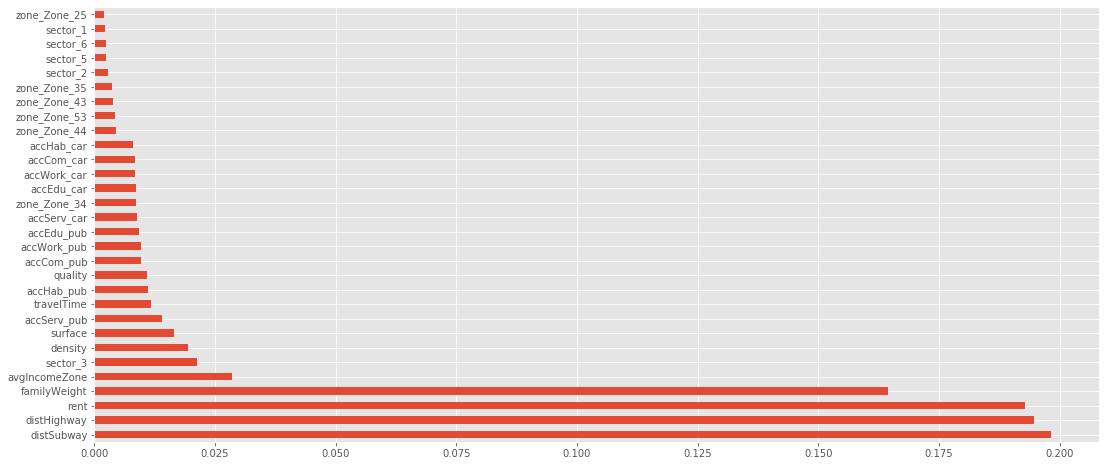

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
model = ExtraTreesClassifier()
model.fit(fea_data_X, fea_data_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=fea_data_X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

C:\Users\han\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[1.89593264e-01 1.68998647e-01 2.20916484e-02 9.89801443e-03
 9.58640920e-03 2.05840565e-01 1.98974367e-01 1.11088395e-02
 2.10220062e-02 8.49596529e-03 7.06632121e-03 8.02178690e-03
 8.29692141e-03 9.41256405e-03 8.90198873e-03 8.92421075e-03
 7.27753966e-03 7.53688508e-03 8.69151719e-03 1.36355655e-03
 7.90224177e-04 3.03226141e-02 0.00000000e+00 2.63924866e-03
 1.71648528e-03 1.22755023e-03 3.08011719e-05 1.00562381e-04
 1.35256066e-04 4.71297175e-05 3.15328346e-06 8.47308789e-05
 6.92933561e-05 1.17069674e-04 5.16549362e-05 1.81432175e-04
 2.29879413e-04 2.15781850e-04 1.36010017e-03 1.57139363e-03
 4.11912208e-05 1.16849489e-05 1.48469276e-04 1.26783620e-03
 8.32377447e-03 4.88447679e-03 3.17614424e-04 3.11695192e-03
 0.00000000e+00 1.37775620e-02 7.94316157e-06 3.36104568e-05
 5.65269223e-04 6.87997777e-04 3.86063885e-03 2.93166510e-04
 3.38047650e-05 5.81070569e-05 1.20353637e-04 2.98917383e-05
 4.22277855e-04]


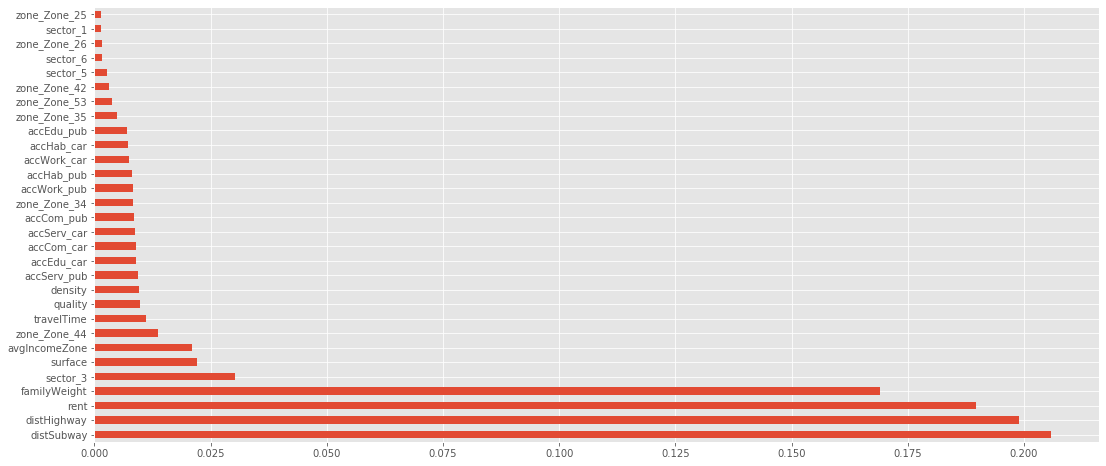

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
plt.figure(figsize=(18,8))
model.fit(X_train2, y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=fea_data_X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

With ExtraTreesClassifier, and with different dataset (second dataset is standardized) we can see that, important features are more or less same with the previous chi-square univariate selection. distSubway, distHighway, rent, familyWeight, sector_3, surface, avgIncomeZone, Zone44, Traveltime, quality, density and some of the accessebility attributes are among the important ones.

Before deciding on the final attribute set, let's dig into collinear features which can lead model to perform worse since same in the logic of logistic regression or other model penalizers.

### 3) Collinear Features
#### Collinear features are features that are highly correlated with one another. In machine learning, these lead to decreased generalization performance on the test set due to high variance and less model interpretability.
#### The identify_collinear method finds collinear features based on a specified correlation coefficient value. For each pair of correlated features, it identifies one of the features for removal (since we only need to remove one):

link for the package:
https://github.com/WillKoehrsen/feature-selector/blob/master/feature_selector/feature_selector.py


In [94]:
from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = fea_data, labels = fea_data.columns)
fs.identify_collinear(correlation_threshold = 0.85)

8 features with a correlation magnitude greater than 0.85.



**Collinear features** are features that are highly correlated with one another. In machine learning, these lead to decreased generalization performance on the test set __due to high variance and less model interpretability.__
The identify_collinear method finds collinear features based on a specified correlation coefficient value. For each pair of correlated features, it identifies one of the features for removal (since we only need to remove one):

<Figure size 432x288 with 0 Axes>

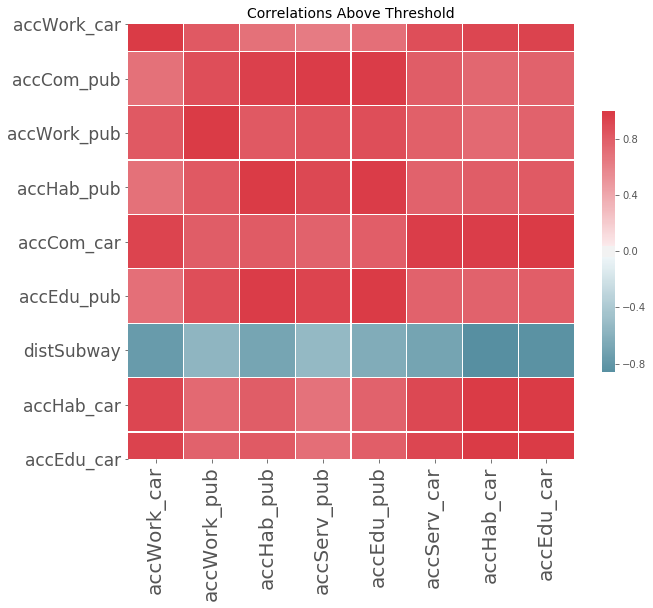

In [95]:
import matplotlib.pyplot as plt
plt.rcParams['savefig.facecolor'] = "0.80"
plt.tight_layout()
fs.plot_collinear()

As before, we can access the entire list of correlated features that will be removed, or see the highly correlated pairs of features in a dataframe.

In [96]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
drop_features = fs.record_collinear.head(61)
drop_features = drop_features.sort_values(by=['corr_value'], ascending = False)
drop_features = drop_features.reset_index(drop=True)
drop_features.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
drop_feature,accHab_car,accEdu_car,accHab_pub,accEdu_pub,accServ_pub,accHab_car,accServ_car,accHab_pub,accWork_car,accWork_car,accServ_pub,accWork_car,accServ_car,accServ_car,accServ_pub,accWork_pub,accServ_car,accWork_pub,accServ_pub,accHab_car
corr_feature,accEdu_car,accCom_car,accEdu_pub,accCom_pub,accCom_pub,accCom_car,accCom_car,accCom_pub,accEdu_car,accCom_car,accEdu_pub,accHab_car,accEdu_car,accHab_car,accHab_pub,accCom_pub,accWork_car,accEdu_pub,accWork_pub,distSubway
corr_value,0.995276,0.985723,0.984081,0.981816,0.981242,0.976784,0.976187,0.962538,0.941948,0.93993,0.936323,0.929287,0.927692,0.915522,0.913535,0.890291,0.889591,0.878267,0.850408,-0.860724


In [97]:
drop_labels = ["corr_feature", "corr_value"]
drop_features.drop(drop_labels, inplace = True, axis = 1)
drop_features = drop_features.values
print(len(drop_features))

20


In [98]:
drop_fea = []
for fea in drop_features:
    if fea not in drop_fea:
        drop_fea.append(fea[0])
    else:
        pass
print(drop_fea, len(drop_fea))

['accHab_car', 'accEdu_car', 'accHab_pub', 'accEdu_pub', 'accServ_pub', 'accServ_car', 'accWork_car', 'accWork_pub'] 8


Above attributes will be dropped due to their high correlation, high variance. They cause less model interpretability.

## 4) Recursive feature elimination with cross-validation
#### The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

- It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

- Below uses RFE with the logistic regression algorithm to select the top 10 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [130]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C = 0.001,solver= 'newton-cg', multi_class="multinomial")
rfe = RFE(model, 10)
fit = rfe.fit(X_train2, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\han\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features: 10
Selected Features: [ True False  True  True  True False False False  True False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True False False
 False  True False False False False False False False False False False
 False]
Feature Ranking: [ 1  9  1  1  1  8  5 16  1 10 29 22 19  4 12 23 18  7  6 11  2  1 52 14
 28 17 45 31 26 38 49 39 30 36 41 32 42 24 33  3 48 50 43  1  1  1 35 13
 51  1 46 44 20 15 27 34 25 40 37 47 21]


In [131]:
att_na = X_train2.columns
best_feas = []
for i, name in zip(fit.ranking_, att_na):
    if i in range(10):
        best_feas.append(name)
best_feas

['rent',
 'familyWeight',
 'surface',
 'quality',
 'density',
 'distSubway',
 'distHighway',
 'avgIncomeZone',
 'accServ_pub',
 'accWork_car',
 'accServ_car',
 'sector_2',
 'sector_3',
 'zone_Zone_26',
 'zone_Zone_33',
 'zone_Zone_34',
 'zone_Zone_35',
 'zone_Zone_44']

C:\Users\han\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 2


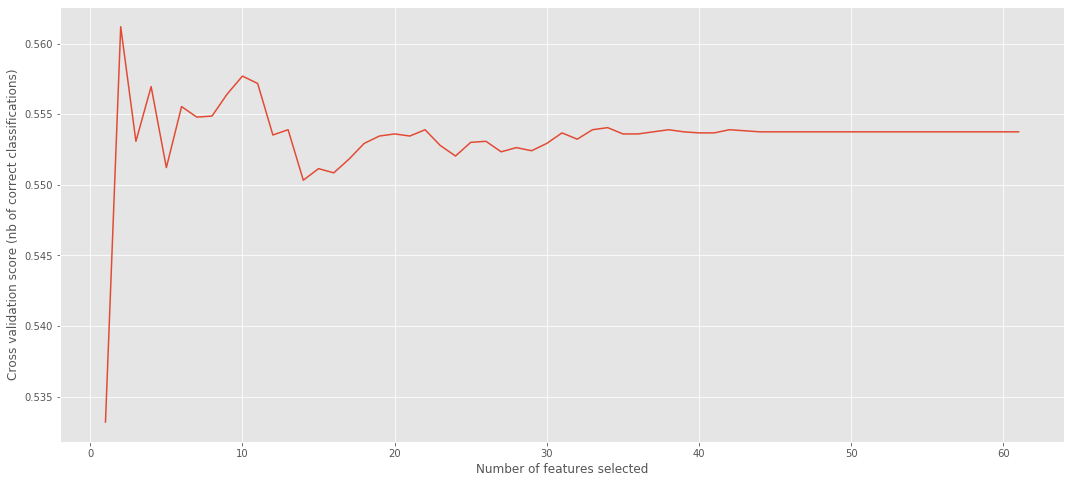

In [132]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

model = LogisticRegression(penalty='l2', C = 0.001,solver= 'newton-cg', multi_class="multinomial")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train2, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(18,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [133]:
rfecv.grid_scores_

array([0.53320429, 0.56119714, 0.55308219, 0.55695354, 0.55122096,
       0.55553901, 0.55479452, 0.55486897, 0.5564324 , 0.55769803,
       0.55717689, 0.55352889, 0.55390113, 0.55032758, 0.55114652,
       0.55084872, 0.55181656, 0.55293329, 0.55345444, 0.55360334,
       0.55345444, 0.55390113, 0.5527844 , 0.5520399 , 0.55300774,
       0.55308219, 0.5523377 , 0.5526355 , 0.55241215, 0.55293329,
       0.55367778, 0.55323109, 0.55390113, 0.55405003, 0.55360334,
       0.55360334, 0.55375223, 0.55390113, 0.55375223, 0.55367778,
       0.55367778, 0.55390113, 0.55382668, 0.55375223, 0.55375223,
       0.55375223, 0.55375223, 0.55375223, 0.55375223, 0.55375223,
       0.55375223, 0.55375223, 0.55375223, 0.55375223, 0.55375223,
       0.55375223, 0.55375223, 0.55375223, 0.55375223, 0.55375223,
       0.55375223])

In [134]:
rfecv.ranking_

array([ 1, 17,  2,  3,  8, 16, 13, 24,  1, 18, 37, 30, 27, 12, 20, 31, 26,
       15, 14, 19, 10,  9, 60, 22, 36, 25, 53, 39, 34, 46, 57, 47, 38, 44,
       49, 40, 50, 32, 41, 11, 56, 58, 51,  7,  4,  5, 43, 21, 59,  6, 54,
       52, 28, 23, 35, 42, 33, 48, 45, 55, 29])

In [135]:
best_feas_2 = []
for i, name in zip(rfecv.ranking_, att_na):
    if i == 1:
    #if i in range(1):
        best_feas_2.append(name)
best_feas_2

['rent', 'avgIncomeZone']

We obtained best result which is over ~%56 with just two attributes which of them are 'rent', 'avgIncomeZone'. Let's just start with these attributes, then add just two attributes of accessebility, then add avera. We will just test with XGboosting and Decision Tree algorithms.

In [136]:
X_tr_1 = X_train2.copy()
X_ts_1 = X_test.copy()
selected_columns = ['rent', 'avgIncomeZone']
X_tr_1 = X_tr_1[selected_columns]
X_ts_1 = X_ts_1[selected_columns]

In [140]:
#Choose all predictors except target & IDcols
predictors = [x for x in X_train.columns]
xgb1 = XGBClassifier(
 learning_rate =0.001,
 n_estimators=250,
 max_depth=2,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.2,
 colsample_bytree=1.0,
 reg_alpha = 0.5,
 reg_lambda = 4.5,
 objective= "multi:softmax",
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, X_tr_1, y_train, X_ts_1, y_test)



Model Report
Accuracy : 0.5212
accuracy: 0.5212237093690248
precision: 0.48567530695770805
recall: 0.6191304347826087
f1 score: 0.5443425076452598


C:\Users\han\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,min_samples_split = 1000)
dt.fit(X_tr_1,y_train)
dt.score(X_ts_1,y_test)
y1_pred = dt.predict(X_ts_1)

evaluate(y_test, y1_pred, print_cm=False)

accuracy: 0.5151051625239006
precision: 0.4814348646947766
recall: 0.6652173913043479
f1 score: 0.5585980284775466


In [156]:
LogReg=LogisticRegression(penalty='l2', C = 0.001,solver= 'newton-cg', multi_class="multinomial") # 10^-3
LogReg.fit(X_tr_1,y_train)
y_pred_test = LogReg.predict(X_ts_1)
print("- Test set results:")
evaluate(y_test, y_pred_test)

- Test set results:
accuracy: 0.5078393881453155
precision: 0.4720982142857143
recall: 0.7356521739130435
f1 score: 0.5751189666893269


C:\Users\han\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Especially for decision tree classifier result improved by ~%3. Now we will keep adding attributes to our "selected_columns" list to make our train data bigger according to feature selection results. At sum point we won't be keep adding.

Below printed attributes will be added to model. Since collineartiy that we have aforementioned.

In [150]:
a = ['accCom_pub','accEdu_pub', 'accHab_pub', 'accWork_pub', 'accServ_pub', 'accCom_car',
       'accEdu_car', 'accHab_car', 'accWork_car', 'accServ_car']  
b = ['accHab_car', 'accEdu_car', 'accHab_pub', 'accEdu_pub', 'accServ_pub', 'accServ_car', 'accWork_car', 'accWork_pub']
for i in a:
    if i not in b:
        print(i)

accCom_pub
accCom_car


In [157]:
X_tr_1 = X_train2.copy()
X_ts_1 = X_test.copy()
selected_columns = ['rent', 'avgIncomeZone', 'accCom_pub', 'accCom_car']
X_tr_1 = X_tr_1[selected_columns]
X_ts_1 = X_ts_1[selected_columns]

#Choose all predictors except target & IDcols
predictors = [x for x in X_train.columns]
xgb1 = XGBClassifier(
 learning_rate =0.001,
 n_estimators=250,
 max_depth=2,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.2,
 colsample_bytree=1.0,
 reg_alpha = 0.5,
 reg_lambda = 4.5,
 objective= "multi:softmax",
 nthread=4,
 scale_pos_weight=1,
 seed=27)
print("XGboosting Classifier Results:")
modelfit(xgb1, X_tr_1, y_train, X_ts_1, y_test)

print("\nDecision Tree Classifier Results:")
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,min_samples_split = 1000)
dt.fit(X_tr_1,y_train)
dt.score(X_ts_1,y_test)
y1_pred = dt.predict(X_ts_1)
evaluate(y_test, y1_pred, print_cm=False)

print("\nLogistic Regression Classifier Results:")
LogReg=LogisticRegression(penalty='l2', C = 0.001,solver= 'newton-cg', multi_class="multinomial") # 10^-3
LogReg.fit(X_tr_1,y_train)
y_pred_test = LogReg.predict(X_ts_1)
print("- Test set results:")
evaluate(y_test, y_pred_test)

XGboosting Classifier Results:


C:\Users\han\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\han\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.5212
accuracy: 0.5212237093690248
precision: 0.48567530695770805
recall: 0.6191304347826087
f1 score: 0.5443425076452598

Decision Tree Classifier Results:
accuracy: 0.48221797323135757
precision: 0.4652777777777778
recall: 0.5243478260869565
f1 score: 0.49304987735077677

Logistic Regression Classifier Results:
- Test set results:
accuracy: 0.5078393881453155
precision: 0.4720982142857143
recall: 0.7356521739130435
f1 score: 0.5751189666893269


Decision Tree has got worse results, but XGBoosting and Logistic Regression isn't affectted.

We will add the attributes of distSubway, distHighway, rent, familyWeight, sector_3, surface, avgIncomeZone, Zone44, Traveltime, quality, density acccording to chi-square univariate selection and extra tree classifier results. And According to results of Recursive feature elimination with cross-validation we have selected some more columns from the zones. And of course some attributes like avgIncomeZone, surface etc. are common features as seleceted.

In [163]:
X_tr_1 = X_train2.copy()
X_ts_1 = X_test.copy()
selected_columns = ['rent', 'avgIncomeZone', 'accCom_pub', 'accCom_car',
                   'distSubway', 'distHighway', 'familyWeight', 'sector_3', 'surface',
                    'zone_Zone_26', 'zone_Zone_33', 'zone_Zone_34', 'zone_Zone_35', 'zone_Zone_44', 'zone_Zone_43', 'zone_Zone_53']
X_tr_1 = X_tr_1[selected_columns]
X_ts_1 = X_ts_1[selected_columns]

#Choose all predictors except target & IDcols
predictors = [x for x in X_train.columns]
xgb1 = XGBClassifier(
 learning_rate =0.001,
 n_estimators=250,
 max_depth=2,
 min_child_weight=1,
 gamma=0.5,
 subsample=0.2,
 colsample_bytree=1.0,
 reg_alpha = 0.5,
 reg_lambda = 4.5,
 objective= "multi:softmax",
 nthread=4,
 scale_pos_weight=1,
 seed=27)
print("XGboosting Classifier Results:")
modelfit(xgb1, X_tr_1, y_train, X_ts_1, y_test)

print("\nDecision Tree Classifier Results:")
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,min_samples_split = 1000)
dt.fit(X_tr_1,y_train)
dt.score(X_ts_1,y_test)
y1_pred = dt.predict(X_ts_1)
evaluate(y_test, y1_pred, print_cm=False)

print("\nLogistic Regression Classifier Results:")
LogReg=LogisticRegression(penalty='l2', C = 0.001,solver= 'newton-cg', multi_class="multinomial") # 10^-3
LogReg.fit(X_tr_1,y_train)
y_pred_test = LogReg.predict(X_ts_1)
print("- Test set results:")
evaluate(y_test, y_pred_test)

XGboosting Classifier Results:

Model Report
Accuracy : 0.5228
accuracy: 0.5227533460803059
precision: 0.48762035763411277
recall: 0.6165217391304347
f1 score: 0.5445468509984639

Decision Tree Classifier Results:
accuracy: 0.49292543021032503
precision: 0.4755412991178829
recall: 0.5156521739130435
f1 score: 0.4947851481017939

Logistic Regression Classifier Results:


C:\Users\han\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Test set results:
accuracy: 0.5380497131931167
precision: 0.4900051255766274
recall: 0.831304347826087
f1 score: 0.616575298290874


As a result we can say that, we have obtained best accuracy level as ~%54 with logistic regression. We will try basic neural network to have some result with new dataframe.

In [164]:
X_tr_1.shape

(13432, 16)

In [170]:
from tensorflow.keras import regularizers

def create_network(learn_rate=0.01, momentum=0.9, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(100, input_shape=(16,), activation='relu')) #, kernel_regularizer=regularizers.l2(0.001)
    #model.add(Dropout(dropout_rate))
    model.add(Dense(30, activation='relu')) # , kernel_regularizer=regularizers.l2(0.001)
    #model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax')) # , kernel_regularizer=regularizers.l2(0.001)
    #stochastic gradient descent
    sgd = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
neural_network = KerasClassifier(build_fn=create_network, verbose=0, epochs=10, batch_size=100) # epochs=100, batch_size=10,

neural_network.fit(X_tr_1, Y, epochs=100, batch_size=100)

# evaluate the keras model
y_pred = neural_network.predict(X_ts_1)
#y_pred = np.argmax(y_pred, axis=1)

# evaluate predictions
print("- Test set results:")
evaluate(y_test, y_pred)

- Test set results:
accuracy: 0.5277246653919694
precision: 0.5276008492569002
recall: 0.43217391304347824
f1 score: 0.47514340344168254


For the new data frame, we applied neural network with parameter tuning. 

In [171]:
from tensorflow.keras import regularizers

def create_network(learn_rate=0.01, momentum=0.0, dropout_rate=0.0, neurons1=30, neurons2=8, regu = 0.001):
    model = Sequential()
    model.add(Dense(neurons1, input_shape=(16,), activation='relu', kernel_regularizer=regularizers.l2(regu)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation='relu', kernel_regularizer=regularizers.l2(regu)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(regu)))
    #stochastic gradient descent
    sgd = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
neural_network = KerasClassifier(build_fn=create_network, verbose=0) # epochs=100, batch_size=10,

learn_rate = [0.001, 0.1]
momentum = [0.0, 0.9]
batch_size = [100, 200]
epochs = [10, 100]
dropout_rate = [0.0, 0.5]
neurons1 = [60]
neurons2 = [20]
regu = [0, 0.001]

param_grid = dict(batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, momentum=momentum, 
                  dropout_rate=dropout_rate, neurons1=neurons1, regu = regu) #, neurons2=neurons2

grid = GridSearchCV(estimator=neural_network, param_grid=param_grid, n_jobs=1, cv=5)

grid_result = grid.fit(X_tr_1, Y)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# That's end of data preparation and prediction part. Data exploration part will be delivered at a new notebook.

## In this project every one in the group contribute equally(33.3%) in all parts.